<a href="https://colab.research.google.com/github/MayankHQ/machine_learning/blob/main/Zscore_Ttest_chisquare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Z-score test to check outliers**

Total Outliers Found: 3
Outlier Values: [100. 110. -20.]


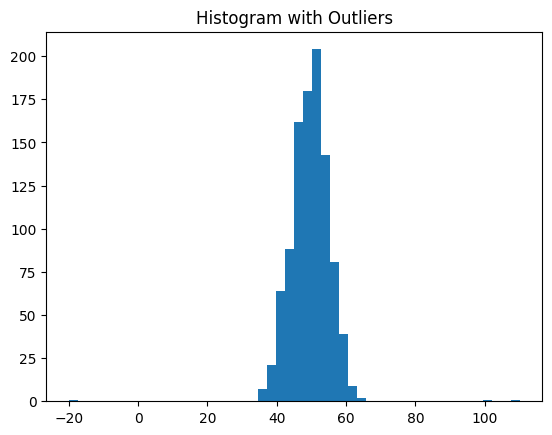

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Generate Normal Data (Mean=50, Std=5, N=1000)
data = np.random.normal(loc=50, scale=5, size=1000)

# 2. Add some "Crazy" Outliers manually
outliers = [100, 110, -20] # These are WAY far from 50
data = np.concatenate([data, outliers])

# 3. Calculate Z-Scores
# (This subtracts mean and divides by std for every point)
z_scores = np.abs(stats.zscore(data))

# 4. Filter: Who is weirder than 3 Sigmas?
threshold = 3
outlier_indices = np.where(z_scores > threshold)

print(f"Total Outliers Found: {len(outlier_indices[0])}")
print(f"Outlier Values: {data[outlier_indices]}")

# 5. Visualize
plt.hist(data, bins=50)
plt.title("Histogram with Outliers")
plt.show()

## **T-test to compare numbers**

In [1]:
from scipy import stats
import numpy as np

# 1. Create Data
# Group A: Average 50
group_a = np.random.normal(50, 10, 100)
# Group B: Average 55 (Slightly smarter)
group_b = np.random.normal(55, 10, 100)

# 2. Run T-Test
# This compares the means and variance of two groups
t_stat, p_val = stats.ttest_ind(group_a, group_b)

print(f"P-Value: {p_val:.5f}")

# 3. The Decision
if p_val < 0.05:
    print("Result: REJECT Null Hypothesis.")
    print("Conclusion: The groups are DIFFERENT (Statistically Significant).")
else:
    print("Result: KEEP Null Hypothesis.")
    print("Conclusion: The difference might just be luck.")

P-Value: 0.00008
Result: REJECT Null Hypothesis.
Conclusion: The groups are DIFFERENT (Statistically Significant).


### **Chi- square test to compare categories**

In [2]:
import numpy as np
from scipy.stats import chi2_contingency

# 1. Create the "Contingency Table" (The Grid)
# Rows = Men, Women
# Cols = Vanilla, Chocolate
observed_data = np.array([
    [20, 30], # Men: 20 Vanilla, 30 Chocolate
    [30, 20]  # Women: 30 Vanilla, 20 Chocolate
])

# 2. Run the Test
chi2_stat, p_val, dof, expected = chi2_contingency(observed_data)

print(f"Chi2 Stat: {chi2_stat:.2f}")
print(f"P-Value:   {p_val:.4f}")

# 3. Interpret
if p_val < 0.05:
    print("Result: REJECT Null. (Gender and Preference are RELATED)")
else:
    print("Result: KEEP Null. (No relationship found)")

Chi2 Stat: 3.24
P-Value:   0.0719
Result: KEEP Null. (No relationship found)
